In [207]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
import numpy as np
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from hwfanalysis.hwf_data import *
from hwfanalysis.plotting import *
import plotly.offline
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams.update({'font.size': 18})


In [209]:
# load HWF data
df = load_reformatted_hwf_csv("/home/user/Dropbox/HWF_data/hwf_clean_2020-05-12.csv")

In [4]:
print("Total responses: %d" % df.shape[0])
print("Total users: %d" % df.session_id.nunique())

Total responses: 3047612
Total users: 489241


In [210]:
print("Total responses: %d" % df.shape[0])
print("Total users: %d" % df.session_id.nunique())

Total responses: 3661716
Total users: 502731


## Fig. 1C

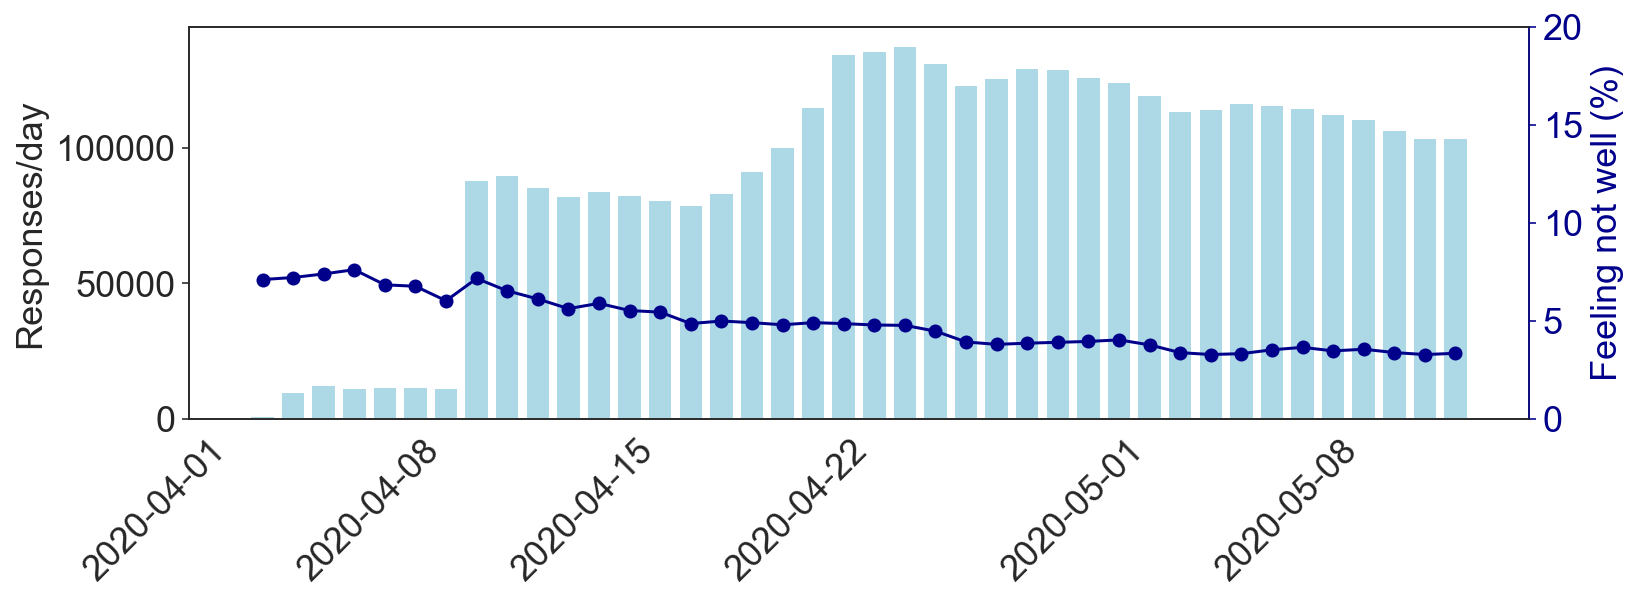

In [216]:
fig, ax = plt.subplots(figsize=(12,4))
ax2 = ax.twinx()
session_id_by_time = df.groupby('date')['session_id'].nunique().reset_index()#.plot(kind='line',ax=ax,color='k')
not_well_pct = df.groupby('date')['feeling'].apply(lambda x: np.sum(x=='not_well')/len(x)).reset_index()
ax.bar(session_id_by_time.date, session_id_by_time.session_id,color='lightblue')
ax2.plot(not_well_pct.date, not_well_pct.feeling*100, 'o-',color='darkblue')
ax2.set_ylim([0,20])
ax.set_ylabel('Responses/day')
ax2.set_ylabel('Feeling not well (%)')
ax2.tick_params(axis='y', colors='darkblue')
ax2.yaxis.label.set_color('darkblue')
ax2.spines["right"].set_edgecolor('darkblue')
#ax.set_xticks(np.arange(len(session_id_by_time.date)))
#ax2.set_xticks(np.arange(len(session_id_by_time.date)))
fig.autofmt_xdate(rotation=45)
#ax.set_xticklabels(session_id_by_time.date,rotation=90)
plt.savefig("/home/user/Dropbox/HWF_paper1_figures/plots/fig1_response_distr.pdf")

## Fig. 1D -- User distribution

In [217]:
from hwfanalysis.plotting import *
geoplotter = GeoPlotter()

Loading county JSON data...


In [218]:
import plotly.offline as offline
from plotly.offline import init_notebook_mode, plot_mpl
import shutil

In [219]:
# state population
state_users = df.groupby('location_admin_level_1')['session_id'].nunique().reset_index()
fig = geoplotter.plot_data_by_state(state_users,
                              column='session_id',color_scale='Blues')
fig_output = 'fig1_users_by_state'
offline.plot(fig, auto_open=True, validate=False, image = 'png', image_filename=fig_output,
             output_type='file')
shutil.copyfile(os.path.join("/home/user/Downloads/", fig_output+".png"), 
                os.path.join("/home/user/Dropbox/HWF_paper1_figures/plots/", fig_output+".png"))

'/home/user/Dropbox/HWF_paper1_figures/plots/fig1_users_by_state.png'

In [220]:
state_pops = pd.read_csv("../hwfanalysis/data/state-population.csv")
state_pops = state_pops[(state_pops.ages=='total')&(state_pops.year==2012)]

In [221]:
norm_state_users.loc[i,'location_admin_level_1']

'WY'

In [222]:
norm_state_users = state_users.copy()
for i in range(norm_state_users.shape[0]):
    
    curr_pop = state_pops[state_pops['state/region']==norm_state_users.loc[i,'location_admin_level_1']]
    if curr_pop.shape[0] != 0:
        curr_pop = curr_pop.population.values[0]
        norm_state_users.loc[i,'session_id'] = 100*(norm_state_users.loc[i,'session_id']/curr_pop)

In [223]:
# normalized state population
fig_output = 'fig1_norm_users_by_state'

fig = geoplotter.plot_data_by_state(norm_state_users,
                              column='session_id',color_scale='Blues',color_range=[0,0.3])
offline.plot(fig, auto_open=True, validate=False, image = 'png', image_filename=fig_output,
             output_type='file')
shutil.copyfile(os.path.join("/home/user/Downloads/", fig_output+".png"), 
                os.path.join("/home/user/Dropbox/HWF_paper1_figures/plots/", fig_output+".png"))

'/home/user/Dropbox/HWF_paper1_figures/plots/fig1_norm_users_by_state.png'

## Fig. 1E -- Gender

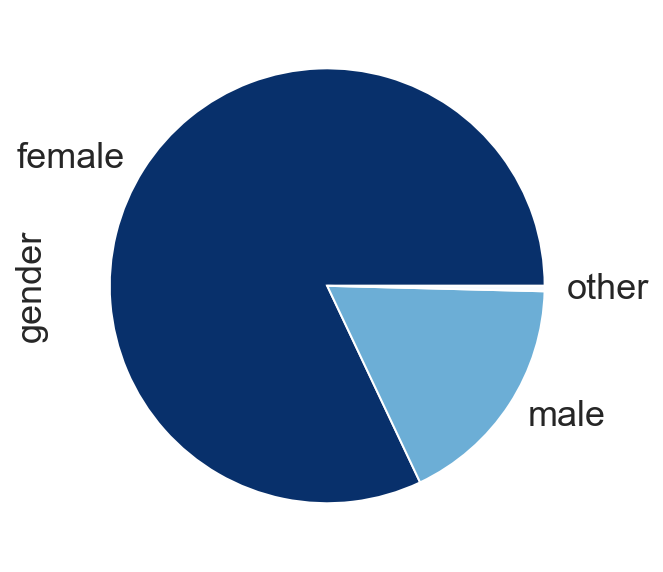

In [224]:
df.groupby('session_id')['gender'].nth(0).value_counts().plot(kind='pie',figsize=(5,5),cmap=plt.cm.Blues_r)
plt.savefig("/home/user/Dropbox/HWF_paper1_figures/plots/fig1_gender.pdf",bbox_inches='tight')

## Fig. 1F -- Age Distribution

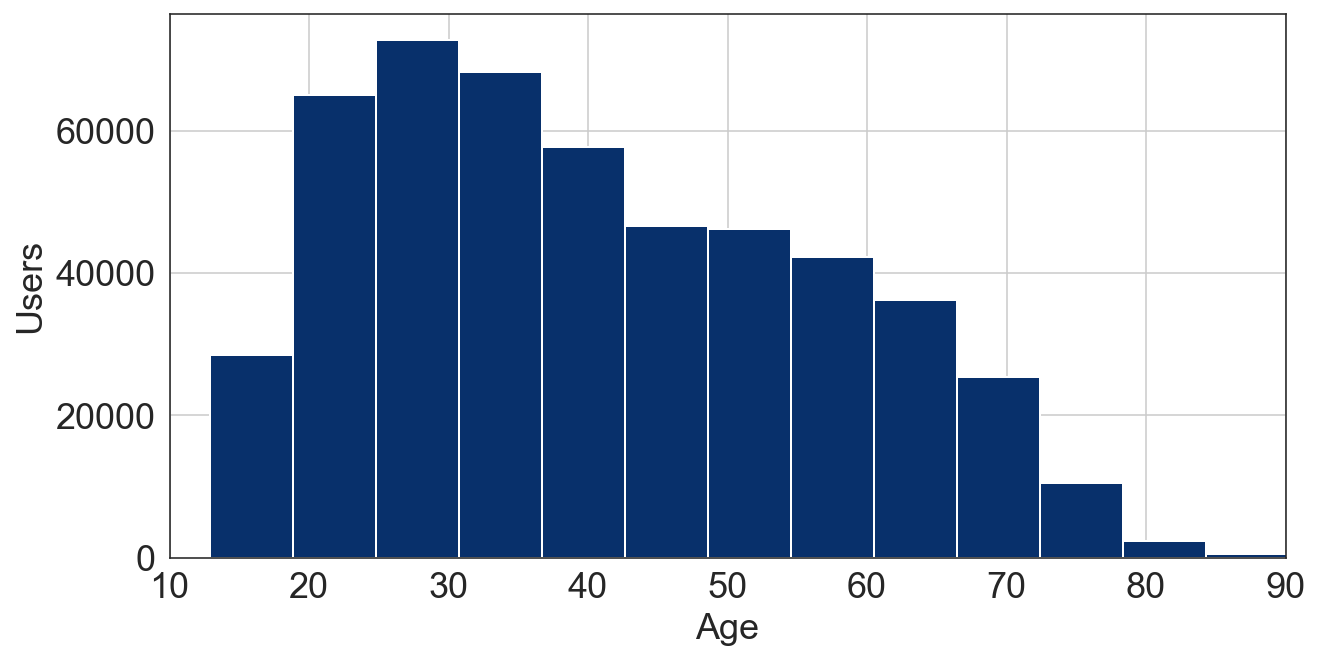

In [225]:
df.groupby('session_id')['age'].nth(0).dropna().hist(figsize=(10,5),bins=20,color=plt.cm.Blues_r(0))
plt.xlim([10,90])
plt.xlabel('Age')
plt.ylabel('Users')
plt.savefig("/home/user/Dropbox/HWF_paper1_figures/plots/fig1_age.pdf",bbox_inches='tight')

## Fig. 1G -- Race Distribution

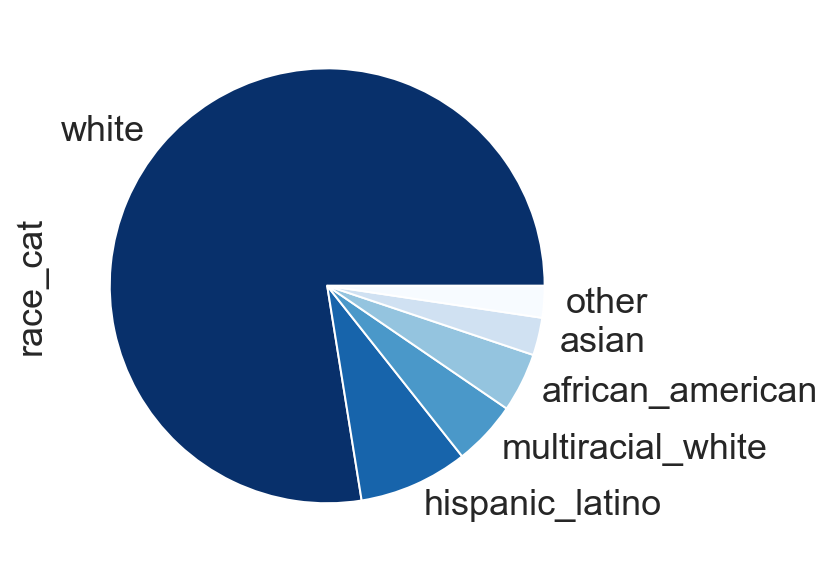

In [226]:
df[df.race_cat!='missing'].groupby('session_id')['race_cat'].nth(0).value_counts().plot(kind='pie',figsize=(5,5), cmap=plt.cm.Blues_r)
plt.savefig("/home/user/Dropbox/HWF_paper1_figures/plots/fig1_race_pie.pdf",bbox_inches='tight')